## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Getting the Names of the columns from the datasets

In [2]:
names = ['Date','WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13',
         'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 
         'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16',
         'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'TAV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 'T70', 
         'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp','Class']

## Reading the Datasets

In [3]:
DF1 = pd.read_csv('onehr.data',names = names)
DF8 = pd.read_csv('eighthr.data', names = names)

## Dropping the Dates

In [4]:
DF1 = DF1.drop(['Date'], axis =1)
DF8 = DF8.drop(['Date'], axis =1)

## Replacing '?' with NaN 

In [5]:
DF1 = DF1.replace('?', np.nan)
DF8 = DF8.replace('?', np.nan)

## Printing DF1 and DF8

In [6]:
DF1

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [7]:
DF8

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Class
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


## Finding percentage of null values 

In [8]:
nl1 = DF1.isnull().sum().values/(len(DF1)/100)
nl1 = ['%.1f' % elem for elem in nl1]
print(nl1)

['11.8', '11.5', '11.6', '11.5', '11.6', '11.5', '11.5', '11.4', '11.4', '11.3', '11.4', '11.5', '11.3', '11.4', '11.4', '11.3', '11.2', '11.2', '11.3', '11.5', '11.6', '11.6', '11.8', '11.7', '10.8', '10.8', '7.5', '7.3', '7.4', '7.3', '7.3', '7.2', '7.2', '7.2', '7.3', '7.3', '7.4', '7.6', '7.5', '7.5', '7.6', '7.4', '7.3', '7.2', '7.3', '7.4', '7.5', '7.3', '7.6', '7.5', '6.9', '6.9', '3.9', '4.1', '7.1', '7.1', '3.7', '4.2', '4.5', '6.2', '6.2', '3.9', '4.5', '4.9', '8.3', '8.3', '4.4', '5.4', '4.9', '3.7', '6.3', '0.1', '0.0']


In [9]:
nl8 = DF8.isnull().sum().values/(len(DF8)/100)
nl8 = ['%.1f' % elem for elem in nl8]
print(nl8)

['11.8', '11.5', '11.6', '11.5', '11.6', '11.5', '11.5', '11.4', '11.4', '11.3', '11.4', '11.5', '11.3', '11.4', '11.4', '11.3', '11.2', '11.2', '11.3', '11.5', '11.6', '11.6', '11.8', '11.7', '10.8', '10.8', '7.5', '7.3', '7.4', '7.3', '7.3', '7.2', '7.2', '7.2', '7.3', '7.3', '7.4', '7.6', '7.5', '7.5', '7.6', '7.4', '7.3', '7.2', '7.3', '7.4', '7.5', '7.3', '7.6', '7.5', '6.9', '6.9', '3.9', '4.1', '7.1', '7.1', '3.7', '4.2', '4.5', '6.2', '6.2', '3.9', '4.5', '4.9', '8.3', '8.3', '4.4', '5.4', '4.9', '3.7', '6.2', '0.1', '0.0']


## Changing the data types of columns 

In [10]:
DF1 = DF1.astype(float)
DF8 = DF8.astype(float)

## Filling up null values with mean

In [11]:
DF1 = DF1.fillna(DF1.mean())
DF8 = DF8.fillna(DF8.mean())

## FOR EIGHTHR DATASET

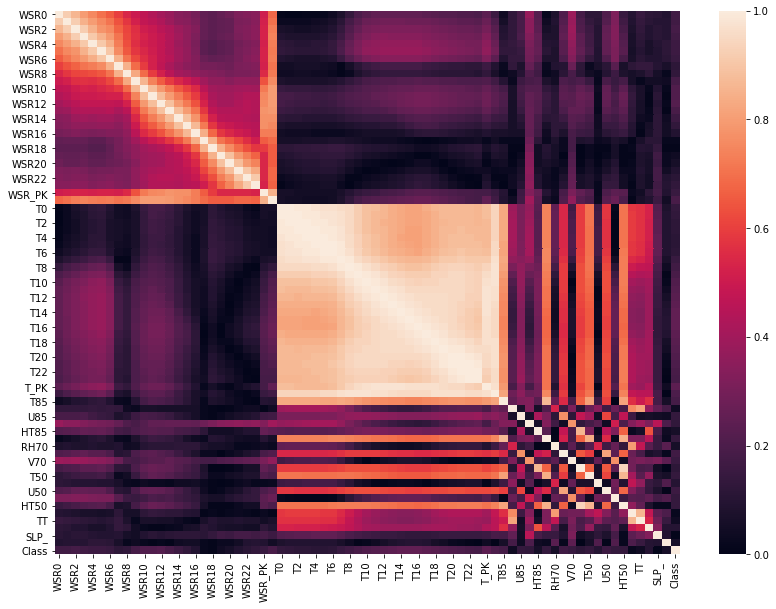

In [12]:
sns.heatmap(round(abs(DF8.corr()),2))

## Implementing Logistic Regression

In [13]:
X = DF8.iloc[:,:-1]
y = DF8.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 49)
print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape, '\n', y_test.shape)

(1900, 72) 
 (1900,) 
 (634, 72) 
 (634,)


## Applying Standard Scaling

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = 10000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=0)

In [17]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[601   6]
 [ 19   8]]


96.06

## Implementing Random Forest

In [18]:
X = DF8.iloc[:,:-1]
y = DF8.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 36)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[607   5]
 [ 18   4]]


96.37

## Implementing SVC (Support Vector Classification)

In [22]:
X = DF1.iloc[:,:-1]
y = DF1.iloc[:,-1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 36)

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[611   8]
 [ 14   1]]


96.53

## FOR ONEHR DATASET

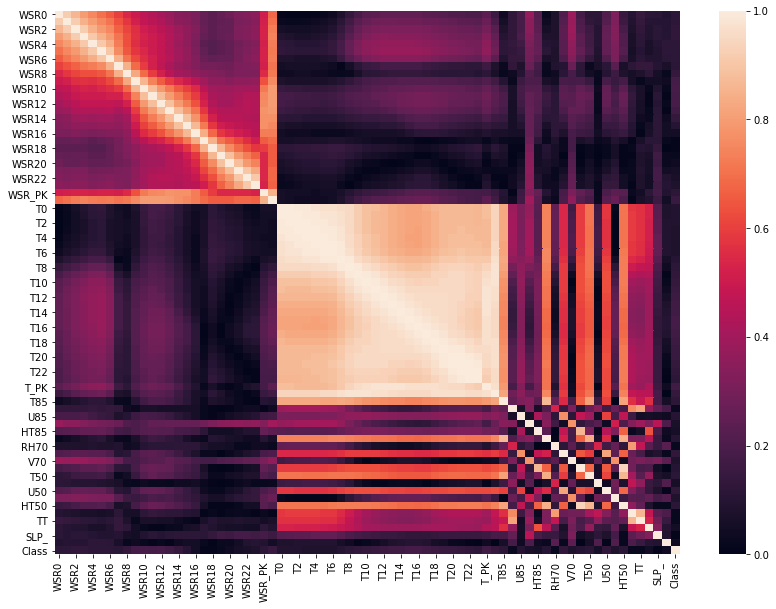

In [26]:
sns.heatmap(round(abs(DF1.corr()),2))

## Implementing Logistic Regression

In [27]:
X = DF1.iloc[:,:-1]
y = DF1.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 89)
print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape, '\n', y_test.shape)

(1902, 72) 
 (1902,) 
 (634, 72) 
 (634,)


## Applying Standard Scaling 

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = 10000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[617   4]
 [  8   5]]


98.11

## Implementing Random Forest

In [32]:
X = DF1.iloc[:,:-1]
y = DF1.iloc[:,-1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 59)

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[621   0]
 [ 10   3]]


98.42

## Implementing SVC (Support Vector Classification)

In [36]:
X = DF1.iloc[:,:-1]
y = DF1.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[620   3]
 [ 11   0]]


97.79

## Creating the table of the accuracies of all the models on both of the datasets

In [40]:
dict = {1: ["Logistic_Regression", "1_hour_data", 98.10], 
         2: ["Logistic_Regression", "8_hour_data", 96.06],
         3: ["Random_Forest", "1_hour_data", 98.42],
         4: ["Random_Forest", "8_hour_data", 96.37],
         5: ["SVC", "1_hour_data", 97.79],
         6: ["SVC", "8_hour_data", 96.52]
        }
# Priting the names of the columns 
print ("{:<20} {:<20} {:<20}".format('MODEL', 'DATASET', 'ACCURACY')) 
# Printing the items in dictionary
for key, value in dict.items(): 
    model, dataset, accuracy = value 
    print ("{:<20} {:<20} {:<20}".format(model, dataset, accuracy)) 

MODEL                DATASET              ACCURACY            
Logistic_Regression  1_hour_data          98.1                
Logistic_Regression  8_hour_data          96.06               
Random_Forest        1_hour_data          98.42               
Random_Forest        8_hour_data          96.37               
SVC                  1_hour_data          97.79               
SVC                  8_hour_data          96.52               
